# Análise de dados de anúncios 

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Inspeção dos tipos de dado.

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Limpeza dos Dados

In [8]:
# Verificando se existe algum valor nulo
advertising.isnull().sum()*100/advertising.shape[0]
# A base de dados não possui valores nulos

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

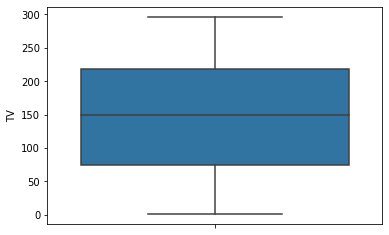

In [13]:
# Análise de Outliers
sns.boxplot(y = advertising['TV'])


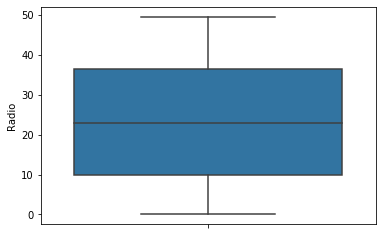

In [14]:
sns.boxplot(y = advertising['Radio'])


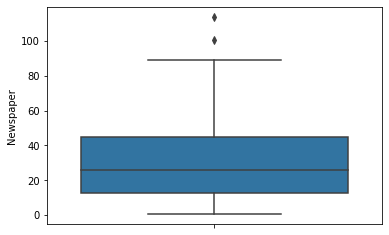

In [15]:
sns.boxplot(y = advertising['Newspaper'])

## Análise Exploratória de Dados

### Análise da Variável 'Sales'

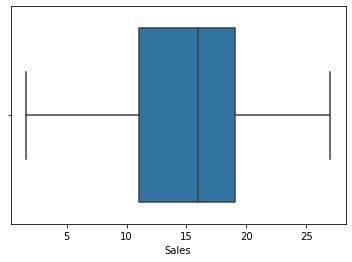

In [16]:
sns.boxplot(advertising['Sales'])

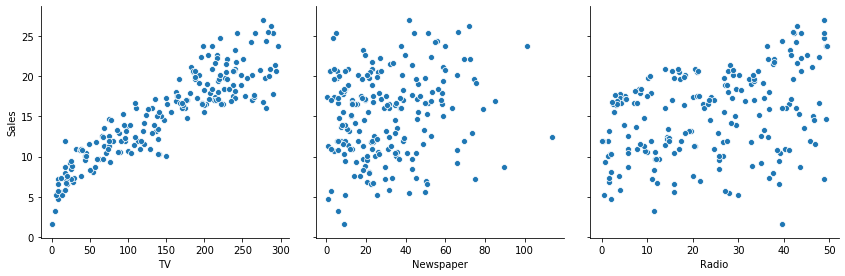

In [24]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

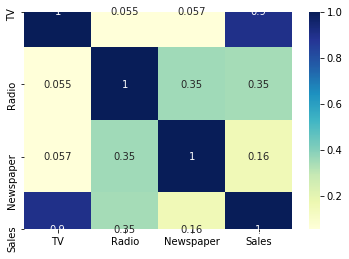

In [25]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Construção do Modelo

## Construindo uma regressão linear simples

In [26]:
X = advertising['TV']
y = advertising['Sales']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [29]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [30]:
import statsmodels.api as sm

In [33]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [34]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [35]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [36]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        17:30:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0



###### Como podemos observar, o modelo de regressão possui um valor de R² de 0.816, o que podemos dizer que 81.6% da variancia das vendas podem ser explicadas pela variável 'TV'

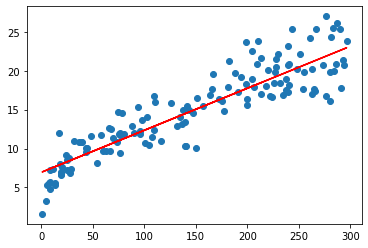

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

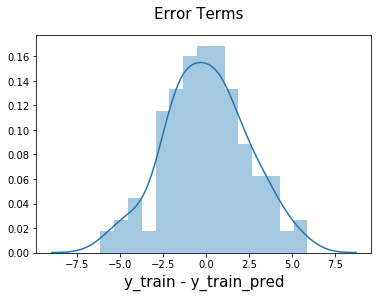

In [38]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

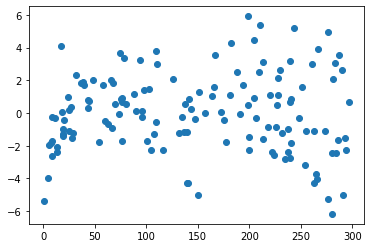

In [39]:
plt.scatter(X_train,res)
plt.show()

Como os erros de previsão do modelo se distribuem normalmente, e o erro de previsão é disperso de maneira uniforme no gráfico acima, podemos concluir que o modelo de regressão linear apresenta uma boa representação do que acontece neste estudo de caso.

In [40]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [41]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [43]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662337

In [44]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245656

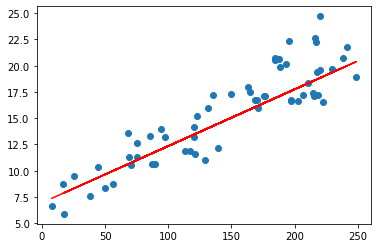

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()